<a href="https://colab.research.google.com/github/lorenagueddes/Ola-Mundo/blob/main/dinamica_DAY5_FLIGHTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNC DATA EXPERT

# Dinâmica 01 - New York Flights

# CARREGAMENTO DAS BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import pyplot

# CARREGAMENTO DOS DADOS

In [ ]:
df = pd.read_csv(r'nyflights.csv')

In [ ]:
df.shape

(336776, 20)

In [ ]:
df.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


Qual o comportamento médio e a variância dos dados dos voos que atrasam 
mais de duas horas?
dep_time = tempo de partida
sched_dep_time = tempo de partida definido
dep_delay = tempo de atraso

In [ ]:
df.dtypes

Unnamed: 0          int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
hour                int64
minute              int64
time_hour          object
dtype: object

# QUESTÕES A SEREM RESPONDIDAS
01 - Quais são as métricas de centralização, variabilidade e quantis dos vôos que atrasam mais que duas horas para decolar? Responda de modo numérico e gráfico.

02 - Quais destinos geraram vôos com o maior número de atrasos na partida? Responda de modo qantitativo e gráfico. (5 piores | Considerar 5 minutos um atraso aceitável)

03 - Para os 5 piores destinos com maior número de voôs atrasados na partida, calcule as estatísticas descritivas da velocidade média durante o vôo.

04 - Aumentar a velocidade média dos voôs pode ser uma solução para diminuir os atrasos? Responda graficamente.

# QUESTÃO 01
Filtrar a tabela: atraso > 2hrs

In [ ]:
dfDelay = df[df['dep_delay'] > 120]


# Estatísticas descritivas para os atraSos

In [ ]:
delayDesc = dfDelay['dep_delay'].describe()

In [ ]:
# Trasnformar as estatísticas descritivas em data frame
delayDesc = pd.DataFrame(delayDesc)

In [ ]:
# Transpor o dataframe e adicionar nas meétricas faltantes
delayDesc = pd.DataFrame.transpose(delayDesc)

In [ ]:
# Adicionar uma coluna para a amplitude
delayDesc['range'] = delayDesc['max'] - delayDesc['min']

In [ ]:
# Adicionar uma coluna para variância
delayDesc['var'] = pow(delayDesc['std'], 2)

In [ ]:
delayDesc

,count,mean,std,min,25%,50%,75%,max,range,var
dep_delay,9723.0,186.983236,74.596836,121.0,139.0,166.0,210.0,1301.0,1180.0,5564.687952


A média de atrasos para os vôos que atrasam mais que duas horas é de 187 minutos com desvio padrão de 75 minutos. A mediana é de 166 minutos. o maior atraso foi de 1301 minutos (21,86 horas... ouch!).

# Análise gráfica dos atrasos maiores que duas horas.
# Histograma

Text(0, 0.5, 'Frequência')

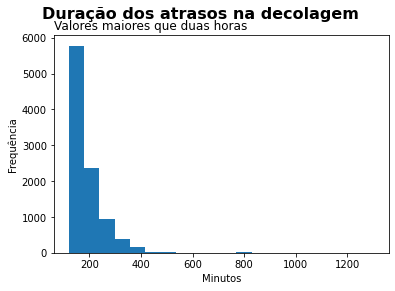

In [ ]:
# Cria a figura 'vazia'
fig = plt.figure()

# Plota o histograma
plt.hist(dfDelay['dep_delay'], bins = 20)

# Adiciona título e subtítulo
plt.suptitle('Duração dos atrasos na decolagem', fontsize = 16, fontweight = 'bold', x = 0.465)
plt.title('Valores maiores que duas horas', loc = 'left')

# Adiciona título aos eixos 
plt.xlabel('Minutos')
plt.ylabel('Frequência')

# Box Plot

Text(0.0, 1.0, 'Valores maiores que duas horas')

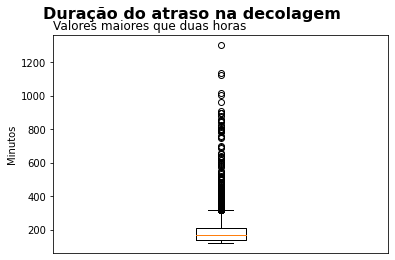

In [ ]:
# Plot figura em branco
fig = plt.figure()

# Plota o gráfico de box plot

plt.boxplot(dfDelay['dep_delay'])

plt.ylabel('Minutos')

# Remove o valor do eixo x
plt.xticks([1], [''])

# Remove o tick do eixo x
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

plt.suptitle('Duração do atraso na decolagem', fontsize = 16, fontweight = 'bold', x = 0.445)
plt.title('Valores maiores que duas horas', loc = 'left')

# QUESTÃO 02
Filtrar tabela com vôos que atrasaram

In [ ]:
dfDest = df[df['dep_delay'] > 5]

# Contar a quantidade de atrasos nos vôos

In [ ]:
delayCounts = dfDest['dest'].value_counts()

In [ ]:
delayCounts = pd.DataFrame(delayCounts)
delayCounts

,dest
ORD,4975
ATL,4687
LAX,4442
MCO,4083
SFO,4078
...,...
MTJ,6
SBN,6
EYW,6
PSP,3


In [ ]:
# Transformar o índice das linhas em uma coluna
delayCounts['destino'] = delayCounts.index

# Mudar o nome da coluna de contagem
delayCounts.columns = ['atrasos', 'destino']

# Remover os valores do index
delayCounts.reset_index(drop = True, inplace = True)

# Mudar a sequência das colunas
delayCounts = delayCounts[['destino', 'atrasos']]

delayCounts

,destino,atrasos
0,ORD,4975
1,ATL,4687
2,LAX,4442
3,MCO,4083
4,SFO,4078
...,...,...
98,MTJ,6
99,SBN,6
100,EYW,6
101,PSP,3


Os 5 destinos que geraram mais vôos atrasados foram: Chicago (ORD), Atlanta (ATL), Los Angeles (LAX), Orlando (MCO) e São Francisco (SFO).

# Gráfico de barras

Text(0.0, 1.0, 'Valores agrupados por diferentes aeroportos')

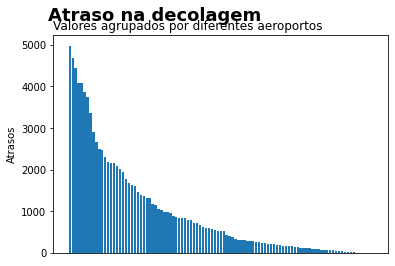

In [ ]:
fig = plt.figure()

plt.bar(delayCounts['destino'], delayCounts['atrasos'])

plt.ylabel('Atrasos')

# Remove o valor do eixo x
plt.xticks([1], [''])

# Remove o tick do eixo x
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

plt.suptitle('Atraso na decolagem', fontsize = 18, fontweight = 'bold', x = 0.36)
plt.title('Valores agrupados por diferentes aeroportos', loc = 'left')

# QUESTÃO 03
Filtrar a tabela somente com os piores destinos

In [ ]:
# Seleciona os piores destinos
worstDest = delayCounts.sort_values(by = 'atrasos', ascending = False)[['destino']][0:4]

In [ ]:
# Filtra a tabela original baseados nos destinos
worstDelay = df[df['dest'].isin(worstDest['destino'])]
worstDelay.reset_index(drop = True, inplace = True)

# Calcular a velocidade média de cada vôo

In [ ]:
worstDelay = worstDelay.assign(avgVel = (worstDelay['distance'] / worstDelay['air_time'])*60)

In [ ]:
worstDelay

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,avgVel
0,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,394.137931
1,6,2013,1,1,554.0,558,-4.0,740.0,728,12.0,...,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00,287.600000
2,9,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,...,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00,404.571429
3,10,2013,1,1,558.0,600,-2.0,753.0,745,8.0,...,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 06:00:00,318.695652
4,13,2013,1,1,558.0,600,-2.0,924.0,917,7.0,...,194,N29129,JFK,LAX,345.0,2475,6,0,2013-01-01 06:00:00,430.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64749,336724,2013,9,30,2052.0,2059,-7.0,2315.0,2358,-43.0,...,1416,N68453,EWR,MCO,123.0,937,20,59,2013-09-30 20:00:00,457.073171
64750,336725,2013,9,30,2053.0,1815,158.0,2310.0,2054,136.0,...,5292,N600QX,EWR,ATL,91.0,746,18,15,2013-09-30 18:00:00,491.868132
64751,336745,2013,9,30,2121.0,2100,21.0,2349.0,14,-25.0,...,2363,N193DN,JFK,LAX,296.0,2475,21,0,2013-09-30 21:00:00,501.689189
64752,336752,2013,9,30,2140.0,2140,0.0,10.0,40,-30.0,...,185,N335AA,JFK,LAX,298.0,2475,21,40,2013-09-30 21:00:00,498.322148


# Agrupar a tabela com os piores destinos

In [ ]:
grouped = worstDelay.groupby(worstDelay['dest'])

# Criar estatísticas descritivas para velocidade média

In [ ]:
grouped.describe()['avgVel']

,count,mean,std,min,25%,50%,75%,max
dest,,,,,,,,
ATL,16837.0,405.182104,33.994256,254.318182,381.000000,406.909091,430.384615,703.384615
LAX,16026.0,452.799331,25.048269,337.500000,435.483871,451.656442,469.936709,540.000000
MCO,13967.0,422.385530,32.109714,265.116279,401.571429,425.864662,445.984252,529.345794
ORD,16566.0,381.130263,31.117499,217.878788,360.491803,382.434783,403.486239,495.862069


# Plotar box-plot para os quatro destinos.

Text(0.0, 1.0, 'Valores maiores que duas horas')

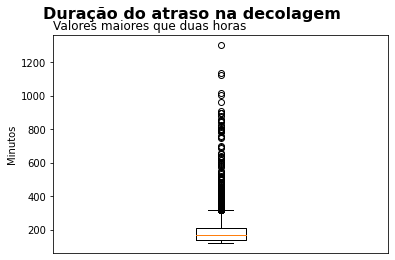

In [ ]:
# Plot figura em branco
fig = plt.figure()

# Plota o gráfico de box plot

plt.boxplot(dfDelay['dep_delay'])

plt.ylabel('Minutos')

# Remove o valor do eixo x
plt.xticks([1], [''])

# Remove o tick do eixo x
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

plt.suptitle('Duração do atraso na decolagem', fontsize = 16, fontweight = 'bold', x = 0.445)
plt.title('Valores maiores que duas horas', loc = 'left')

# QUESTÃO 04
# Criar tabela com os 'melhores destinos'

In [ ]:
# Seleciona os melhores destinos
bestDest = delayCounts.sort_values(by = 'atrasos', ascending = True)[['destino']][0:5]

In [ ]:
# Filtra a tabela original baseados nos destinos
bestDelay = df[df['dest'].isin(bestDest['destino'])]
bestDelay.reset_index(drop = True, inplace = True)

In [ ]:
# Criar a coluna com a volocidade média
bestDelay = bestDelay.assign(avgVel = (bestDelay['distance'] / bestDelay['air_time'])*60)

In [ ]:
# Criar uma coluna com a inscrição 'best'
bestDelay = bestDelay.assign(desType = 'best')

# Empilhar planilha com destinos bons e ruins.

In [ ]:
# Adicionar coluna com a inscrição 'worst' nos priores destinos
worstDelay = worstDelay.assign(desType = 'worst')

In [ ]:
# Crioar a mesma coluna com inscrição 'worst' nos destinos 'ruins'
allDelay = worstDelay.assign(desType = 'worst')

In [ ]:
allDelay = worstDelay.append(bestDelay.reset_index(drop = True), ignore_index = True)

# Criar gráfico de box plot para explorar as diferenças

Text(0.0, 1.0, 'Valores maiores que duas horas')

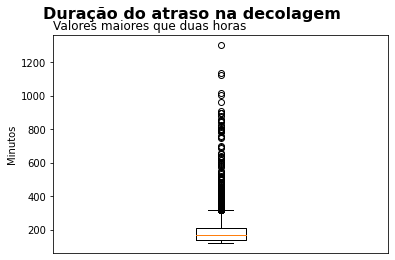

In [ ]:
# Plot figura em branco
fig = plt.figure()

# Plota o gráfico de box plot

plt.boxplot(dfDelay['dep_delay'])

plt.ylabel('Minutos')

# Remove o valor do eixo x
plt.xticks([1], [''])

# Remove o tick do eixo x
plt.tick_params(axis = "x", which = "both", bottom = False, top = False)

plt.suptitle('Duração do atraso na decolagem', fontsize = 16, fontweight = 'bold', x = 0.445)
plt.title('Valores maiores que duas horas', loc = 'left')

As velocidades médias do voôs que mais atrasam e que menos atrasam tende a ser a mesma. Por isso aumentá-la não parece ser uma boa solução inicialmente.

# DAQUI PARA BAIXO SÃO OS CÓDIGOS QUE FORAM DESCRITOS PELA EQUIPE 22 - DAY 05 - 11/06/2022

In [ ]:

df['sched_dep_time'] = df['sched_dep_time'].astype(float, errors = 'raise')
df

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515.0,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400.0,5.0,15.0,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529.0,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416.0,5.0,29.0,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540.0,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089.0,5.0,40.0,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545.0,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576.0,5.0,45.0,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600.0,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762.0,6.0,0.0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163910,163911,2013,3,30,1552.0,1600.0,-8.0,1847.0,1925,-38.0,AA,1467,N3FUAA,LGA,MIA,145.0,1096.0,16.0,0.0,2013-03-30 16:00:00
163911,163912,2013,3,30,1552.0,1540.0,12.0,1703.0,1719,-16.0,UA,473,N829UA,LGA,ORD,113.0,733.0,15.0,40.0,2013-03-30 15:00:00
163912,163913,2013,3,30,1554.0,1545.0,9.0,1815.0,1823,-8.0,DL,95,N1608,JFK,ATL,109.0,760.0,15.0,45.0,2013-03-30 15:00:00
163913,163914,2013,3,30,1554.0,1530.0,24.0,1748.0,1738,10.0,EV,4150,N14568,EWR,CVG,95.0,569.0,15.0,30.0,2013-03-30 15:00:00


In [ ]:
df_ordenado = df.sort_values(by='dep_delay')
df_ordenado

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
89673,89674,2013,12,7,2040.0,2123.0,-43.0,40.0,2352,48.0,B6,97,N592JB,JFK,DEN,265.0,1626.0,21.0,23.0,2013-12-07 21:00:00
113633,113634,2013,2,3,2022.0,2055.0,-33.0,2240.0,2338,-58.0,DL,1715,N612DL,LGA,MSY,162.0,1183.0,20.0,55.0,2013-02-03 20:00:00
64501,64502,2013,11,10,1408.0,1440.0,-32.0,1549.0,1559,-10.0,EV,5713,N825AS,LGA,IAD,52.0,229.0,14.0,40.0,2013-11-10 14:00:00
9619,9620,2013,1,11,1900.0,1930.0,-30.0,2233.0,2243,-10.0,DL,1435,N934DL,LGA,TPA,139.0,1010.0,19.0,30.0,2013-01-11 19:00:00
24915,24916,2013,1,29,1703.0,1730.0,-27.0,1947.0,1957,-10.0,F9,837,N208FR,LGA,DEN,250.0,1620.0,17.0,30.0,2013-01-29 17:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162440,162441,2013,3,28,NaN,1700.0,NaN,NaN,1817,NaN,US,2183,NaN,LGA,DCA,NaN,214.0,17.0,0.0,2013-03-28 17:00:00
163411,163412,2013,3,29,NaN,929.0,NaN,NaN,1044,NaN,EV,4636,N13968,EWR,DCA,NaN,199.0,9.0,29.0,2013-03-29 09:00:00
163412,163413,2013,3,29,NaN,600.0,NaN,NaN,703,NaN,US,2114,NaN,LGA,BOS,NaN,184.0,6.0,0.0,2013-03-29 06:00:00
163413,163414,2013,3,29,NaN,1000.0,NaN,NaN,1121,NaN,US,2169,NaN,LGA,DCA,NaN,214.0,10.0,0.0,2013-03-29 10:00:00


In [ ]:
df.dtypes

Unnamed: 0          int64
year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time    float64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance          float64
hour              float64
minute            float64
time_hour          object
dtype: object

In [ ]:
#comportamento médio dos voos com atrasos de mais de 2 horas

media_voos_2h_atraso = df[['dep_delay']]
media = np.mean(media_voos_2h_atraso, axis=0)
media.round(2)

dep_delay    10.39
dtype: float64

In [ ]:
df2 = df.loc[df["dep_delay"] > 120 ]
df2['dep_delay'].mean()
y = df2['dep_delay'].mean()
print(y/60)





3.0507089241034193


In [ ]:
#variância dos dados dos voos que atrasam mais de duas horas

x = np.var(df2['dep_delay'])
print(x/60)


94.79922385356639


In [ ]:
# filtrar a coluna dep_delay
df2['dep_delay'].describe()

count    3597.000000
mean      183.042535
std        75.429008
min       121.000000
25%       137.000000
50%       162.000000
75%       204.000000
max      1301.000000
Name: dep_delay, dtype: float64

a)Filtrar a tabela com os registrados que atrasam mais de duas horas.

b. Filtrar a coluna 'dep_delay'  e aplicar as funções describe() e .T 
i. Com o describe() algumas medidas de tendência central, mas não temos a 
variância.

c. Adicionar uma coluna para a amplitude: df['range'] = df['max'] - df['min']

d. Adicionar uma coluna para variância: dfT['var'] = pow(dfT_1['std'], 2)